In [1]:
import tensorflow

In [2]:
from tensorflow import keras

## Loading the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Datasets/Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
print(df.shape)

(10000, 14)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

drop the columns rowNumber, customerId, surname

In [11]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [12]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df = pd.get_dummies(df, columns=['Geography','Gender'],drop_first=True, dtype=int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

## Implement MLP 

In [1]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [17]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid' ))

/Users/yash/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
#model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

## using history to store data of training while training

In [21]:
history = model.fit(X_train_trf,y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7331 - loss: 0.5815 - val_accuracy: 0.7969 - val_loss: 0.4787
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.7936 - loss: 0.4678 - val_accuracy: 0.8087 - val_loss: 0.4436
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.8141 - loss: 0.4321 - val_accuracy: 0.8144 - val_loss: 0.4283
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8246 - loss: 0.4110 - val_accuracy: 0.8231 - val_loss: 0.4157
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.8290 - loss: 0.4047 - val_accuracy: 0.8263 - val_loss: 0.4063
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.8336 - loss: 0.3933 - val_accuracy: 0.8388 - val_loss: 0.3936
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.8422 - loss: 0.3775 - val_accuracy: 0.8406 - val_loss: 0.3851
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.8448 - loss: 0.3

In [22]:
model.layers[0].get_weights()

[array([[ 0.11640809,  0.27197513,  0.01738812,  0.38857868, -0.03226351,
         -0.09879044, -0.05365624,  0.50031   , -0.11516396, -0.02459162,
          0.00479334],
        [-0.54888415,  0.01177057,  0.9029816 ,  0.2842968 ,  0.4303196 ,
          0.69810885, -0.2728418 ,  0.36073446, -0.25609446, -0.46463683,
         -0.3707881 ],
        [ 0.26101074,  0.5584654 , -0.03453064, -0.1959907 , -0.00172047,
          0.1788477 , -0.5955163 ,  0.08890767,  0.14633812,  0.4089831 ,
          0.10802508],
        [-0.21238817,  0.16110888, -0.13322262, -0.6606912 , -0.3441703 ,
         -0.31973332,  0.12186   , -0.15587674,  0.29349273, -0.7692988 ,
         -0.67362803],
        [ 0.0631715 ,  0.85679215,  1.041836  ,  0.5880442 , -0.9740509 ,
         -0.15941183,  0.04893655,  0.3836968 ,  0.6484713 , -0.09703322,
         -0.24646913],
        [ 0.0374736 ,  0.37495846,  0.03281514,  0.75682086, -0.16417415,
         -0.19570984, -0.08615939, -0.00567143, -0.8052193 , -0.3846365

In [23]:
model.layers[1].get_weights()

[array([[ 0.6398929 , -0.48861668, -0.2872405 , -0.39446637, -0.5048451 ,
          0.29518256, -0.8673966 , -0.78016883,  0.06504458,  0.05248596,
          0.22175364],
        [ 0.45744857,  0.67999524,  0.5387184 ,  0.28640553, -0.26828304,
          0.03375119,  0.3044755 , -0.69290537, -0.12952791, -0.20238389,
          0.34432104],
        [ 0.9061407 ,  0.73167557, -0.22525209, -0.46602008, -1.1336513 ,
         -0.8148371 , -0.85898346,  0.61731666,  0.04649075, -1.128205  ,
         -0.46865973],
        [-0.38918293,  0.6797255 , -0.25619406, -0.04022023, -0.13913585,
          0.16421601,  0.7100858 ,  0.11506774,  0.5402279 , -0.40564275,
         -0.09481332],
        [ 0.5365956 ,  0.32497883, -0.2839431 , -0.35133392,  0.51448864,
         -0.43846065,  0.7223257 ,  0.44371367, -0.9263587 ,  0.5616536 ,
          0.18720488],
        [-0.6529683 , -0.5235446 ,  0.6419162 , -0.11952394,  0.10233434,
         -0.7211408 ,  0.3046568 ,  0.6711466 ,  0.60573775,  0.3429393

In [24]:
y_log = model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [25]:
#convert the output to 0 or 1
y_pred = np.where(y_log>0.5 ,1,0)

In [26]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## See the accuracy of the model

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,y_pred)

0.8515

## Ploting the curves

In [29]:
history.history

{'accuracy': [0.7757812738418579,
  0.8014062643051147,
  0.8176562786102295,
  0.824999988079071,
  0.8314062356948853,
  0.8374999761581421,
  0.8439062237739563,
  0.8500000238418579,
  0.8518750071525574,
  0.8534374833106995,
  0.85546875,
  0.8564062714576721,
  0.8582812547683716,
  0.8595312237739563,
  0.8592187762260437,
  0.8598437309265137,
  0.8620312213897705,
  0.8623437285423279,
  0.8620312213897705,
  0.86328125,
  0.8653125166893005,
  0.8639062643051147,
  0.8642187714576721,
  0.864062488079071,
  0.8654687404632568,
  0.8645312786102295,
  0.8646875023841858,
  0.8656250238418579,
  0.8643749952316284,
  0.8639062643051147,
  0.864062488079071,
  0.8653125166893005,
  0.8656250238418579,
  0.8646875023841858,
  0.864062488079071,
  0.8659374713897705,
  0.8671875,
  0.8646875023841858,
  0.8668749928474426,
  0.8653125166893005,
  0.8654687404632568,
  0.8648437261581421,
  0.8660937547683716,
  0.8665624856948853,
  0.8656250238418579,
  0.8650000095367432,
  0.8

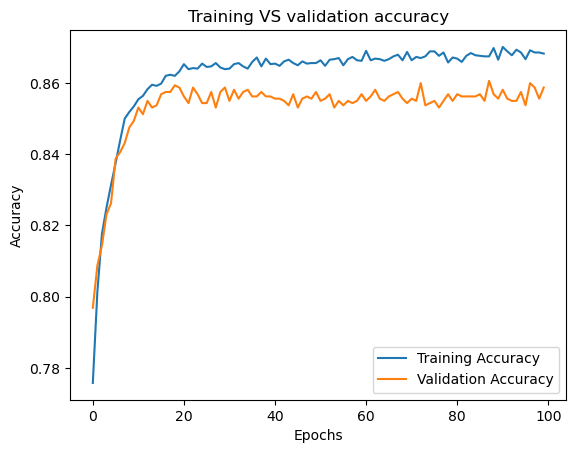

In [35]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label = "Validation Accuracy")
plt.title("Training VS validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

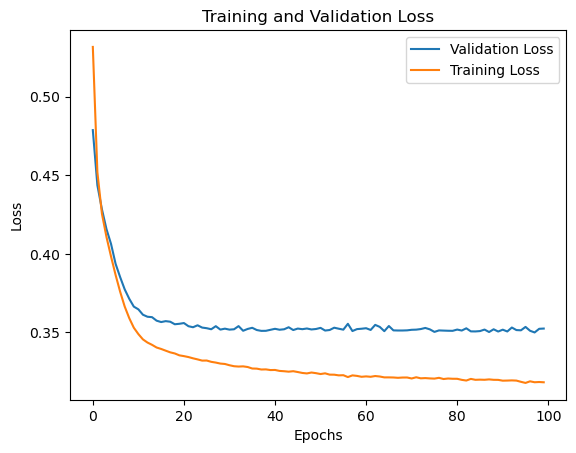

In [33]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Add legend
plt.legend()

plt.show()
